# YES BANK STOCK PRICE ANALYSIS &  PREDICTION

# Labmentix Internship: Developing a Stock Price Prediction Model for Yes Bank Using Machine Learning

* This project was completed as part of my internship at Labmentix, where I gained valuable experience in data analysis, machine learning, and web deployment. This project demonstrates my ability to apply these skills to real-world financial data and create practical applications.

# Project Overview:

* This project, conducted as part of my internship at Labmentix, focuses on the analysis and predictive modeling of Yes Bank stock prices. The project aims to provide insights into the stock's historical performance, identify key trends, and develop accurate forecasting models. By leveraging time series analysis and machine learning techniques, we explore the stock's behavior and build a Streamlit application for easy deployment and use.

# Key Objectives:

* Perform comprehensive Exploratory Data Analysis (EDA) to understand the stock's historical trends, volatility, and distribution.
* Engineer relevant features from the time series data to enhance model performance.
* Develop and evaluate machine learning models, including Random Forest, Ridge Regression, and Linear Regression, for stock price prediction.
* Deploy the best-performing model as an interactive web application using Streamlit.
* Provide clear visualizations and metrics for effective analysis and decision-making.

## Key Libraries Used:

* Pandas: For data manipulation and analysis.
* NumPy: For numerical computations.
* Matplotlib and Seaborn: For data visualization.
* Scikit-learn (sklearn): For machine learning model development, evaluation, and preprocessing.
* Joblib: For model persistence (saving and loading models).

## Streamlit: For deploying the model as a web application.
* Plotly: For interactive plots.
* Mplfinance: for candlestick charts.
* Statsmodels: for time series analysis.

## Methodology:

* Data Acquisition and Cleaning: The project begins with loading the Yes Bank stock price data from a CSV file and performing necessary data cleaning and preprocessing steps.

* Exploratory Data Analysis (EDA): Extensive EDA is conducted to understand the data's characteristics, including time series plots, histograms, box plots, correlation matrices, and advanced visualizations like candlestick charts, parallel coordinates plots, and 3D scatter plots.
Feature Engineering: Relevant features, such as lagged closing prices, price ranges, daily returns, and rolling means, are engineered to improve model performance.

* Model Building and Evaluation: Machine learning models are trained and evaluated using time series cross-validation. The best-performing model is selected based on metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.

* Streamlit Deployment: The selected model is deployed as an interactive web application using Streamlit. Users can input data and obtain stock price predictions in real-time.
Streamlit Deployment:

* The project includes a Streamlit application that allows users to interact with the trained model. The application provides:

* An intuitive user interface for inputting data.
* Real-time stock price predictions.
* Visualizations of the predictions and relevant metrics.

### To run the Streamlit application:

* Ensure you have Streamlit installed (pip install streamlit).
* Save the Streamlit application code as a .py file (e.g., app.py).
* Run the application from your terminal using streamlit run app.py.

# Git Repository Link: https://github.com/kulurunagavardhanreddy/Labmentix-Internship-Developing-a-Stock-Price-Prediction-Model-for-Yes-Bank-Using-Machine-Learning

* To access the complete project code and documentation, please visit the following Git repository:


In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#pip install mplfinance

## Import Necessary Libraries

* Library Imports: Essential libraries for data manipulation, visualization, model building, and evaluation.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

In [4]:
import joblib
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
import os

 # Suppress warnings for cleaner output
* Warning Suppression: warnings.filterwarnings('ignore') prevents warning messages from cluttering the output.

In [5]:
# Import Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading

In [6]:
df = pd.read_csv(r"C:\Users\nag15\OneDrive\Desktop\Labmentix\Yes_Bank_Stock_Price\data_YesBank_StockPrices.csv", parse_dates=['Date'])

## 2. Initial Inspection
* df.head(): Displays the first few rows.
* df.columns: lists the names of all columns.
* df.dtypes: shows the datatypes of all columns.
* df.describe(): provides summary statistics (mean, std, min, max, etc.).
* df.isnull().sum(): checks for missing values in each column.

In [7]:
df.head()

Date   Open   High    Low  Close
0  5-Jul  13.00  14.00  11.25  12.46
1  5-Aug  12.58  14.88  12.55  13.42
2  5-Sep  13.48  14.87  12.27  13.30
3  5-Oct  13.20  14.47  12.40  12.99
4  5-Nov  13.35  13.88  12.88  13.41

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [9]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [10]:
df.describe()

Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000

In [11]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

## 3. Data Cleaning and Preprocessing:

* Date Conversion: This code converts the 'Date' column to datetime objects, specifically assigning the year 2025. Thrs is important for time series analysis. The try except block handles possible date format errors.

In [12]:

try:
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%b').apply(lambda dt: dt.replace(year=2025))
except ValueError:
    print("Date format not recognized. Please check the format.")
    exit()

## 4. Exploratory Data Analysis (EDA)
* Time Series Plots: Visualize the 'Close' price over time.
* Open, High, Low Prices: Visualizes the daily open, high and low prices.
* Rolling Mean: Shows the trend of the stock price, smoothed by a 12-month rolling average.
* Histograms and Box Plots: Show the distribution and outliers of the price data.
* Daily Returns Distribution: Shows the distribution of daily percentage changes in the 'Close' price.
* Pair Plots: Displays scatter plots for each pair of numerical variables.
* Parallel Coordinates Plot: Visualizes relationships between multiple numerical variables. A dummy class column is created to force the plot to display.
* Correlation Heatmap with Daily Returns: Shows the correlation between price metrics and daily returns.
* 3D Scatter Plot: Visualizes the relationship between three variables in 3D.
* Time Series Heatmap: Visualizes price metrics over time using color intensity.
* Violin Plots: Shows the distribution and probability density of price data.
* Interactive Parallel Coordinates Plot (Plotly): Provides an interactive version of the parallel coordinates plot.
* Interactive Time Series Plot (Plotly): Provides an interactive time series plot with a range slider.
* Correlation Matrix: Displays the correlation between price columns.

##  Time Series Visualization:

* These visualizations will show the overall trend and volatility of the stock price.

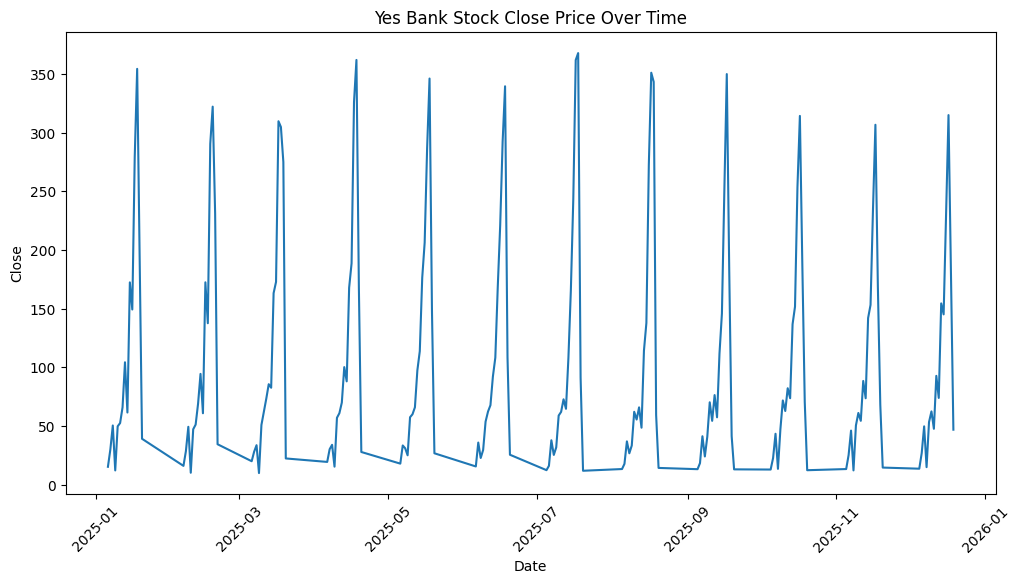

In [13]:
# Time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Yes Bank Stock Close Price Over Time')
plt.xticks(rotation=45)
plt.show()

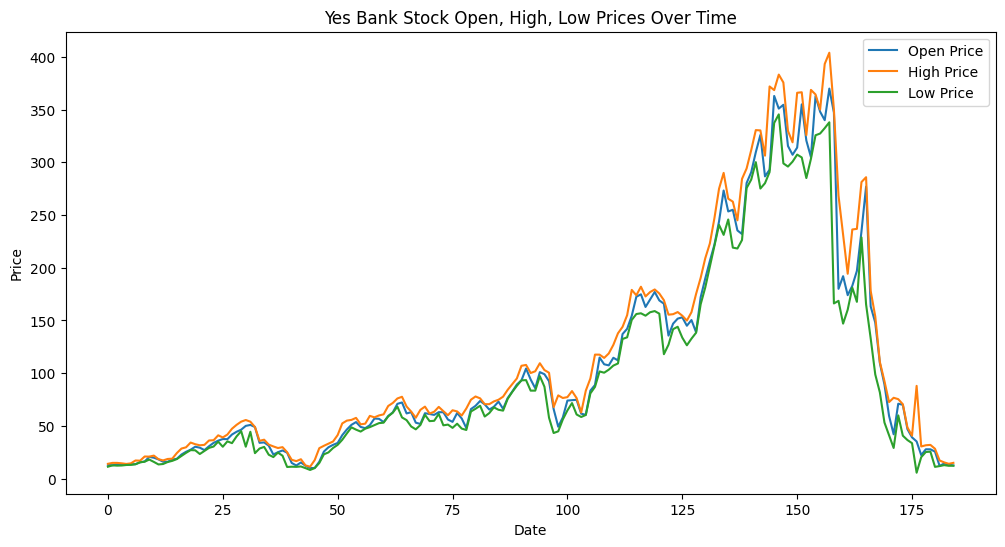

In [14]:
# Time Series Visualization (Open, High, Low)
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label='Open Price')
plt.plot(df['High'], label='High Price')
plt.plot(df['Low'], label='Low Price')
plt.title('Yes Bank Stock Open, High, Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

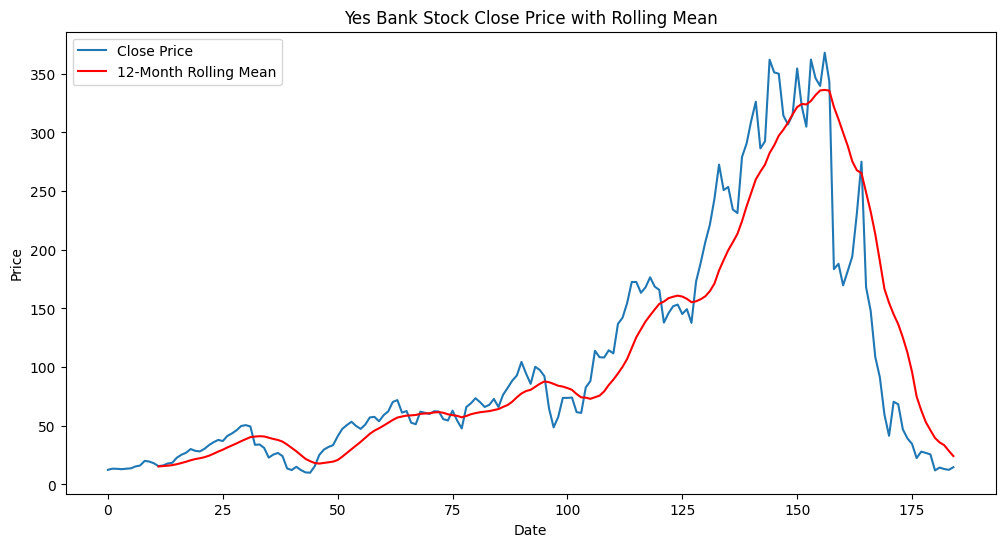

In [15]:
# Rolling Mean Visualization
rolling_mean = df['Close'].rolling(window=12).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(rolling_mean, label='12-Month Rolling Mean', color='red')
plt.title('Yes Bank Stock Close Price with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 5. Histograms and Box Plots:

* Histograms will show the distribution of the prices.
* Box plots will reveal outliers and the spread of the data.

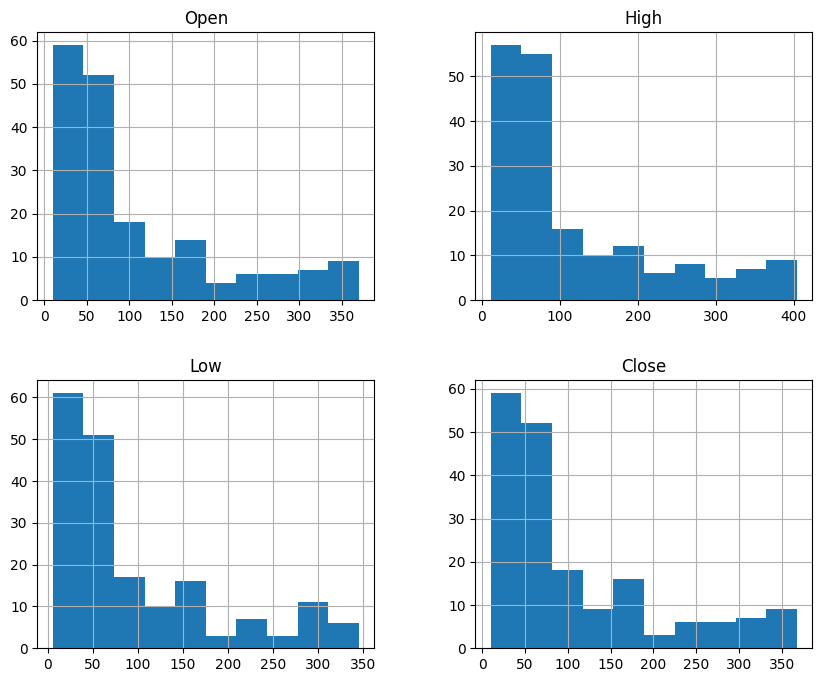

In [16]:
df[['Open', 'High', 'Low', 'Close']].hist(figsize=(10, 8))
plt.show()

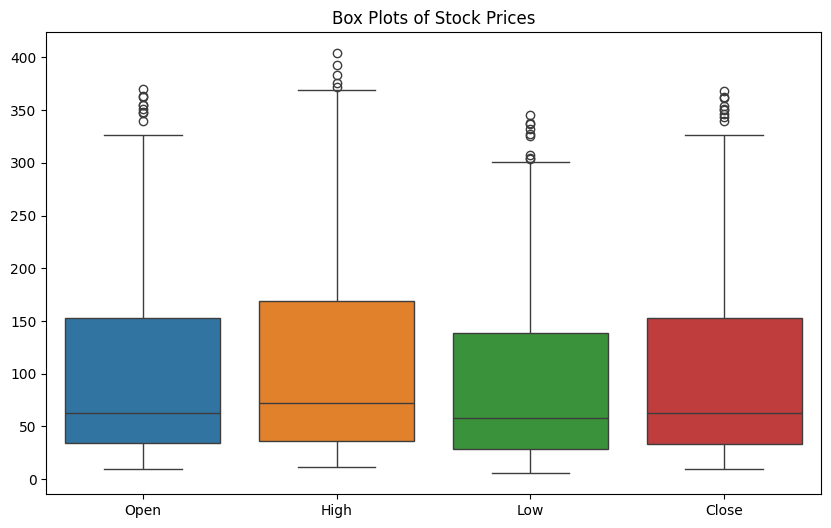

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plots of Stock Prices')
plt.show()

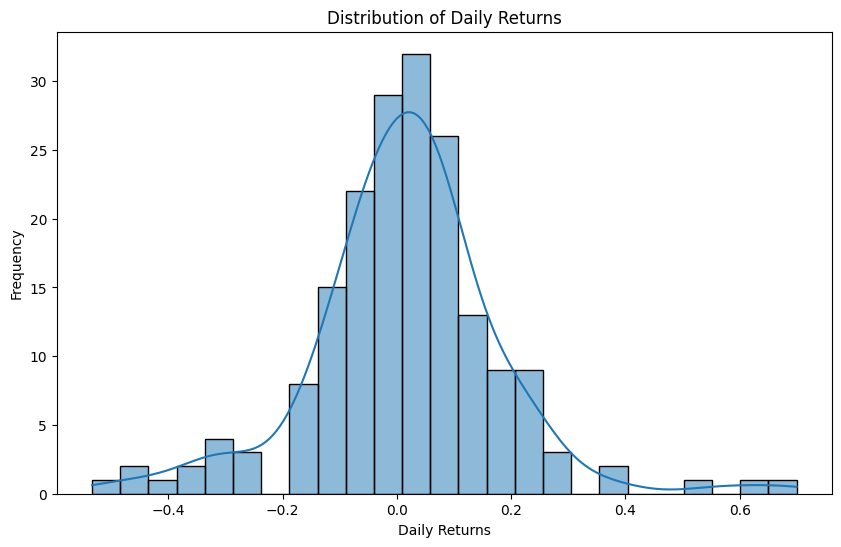

In [18]:
# Daily Returns Distribution
daily_returns = df['Close'].pct_change().dropna()
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

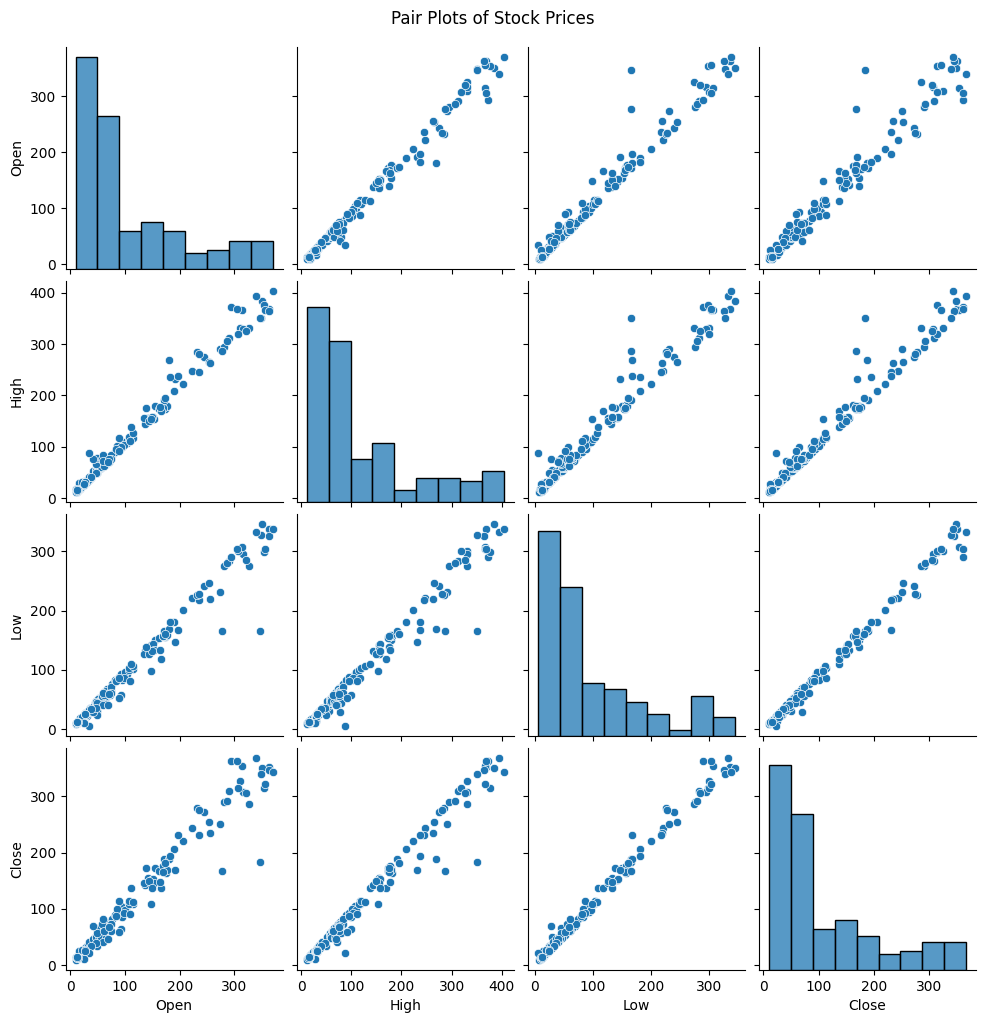

In [19]:
# Pair Plots
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.suptitle('Pair Plots of Stock Prices', y=1.02)
plt.show()

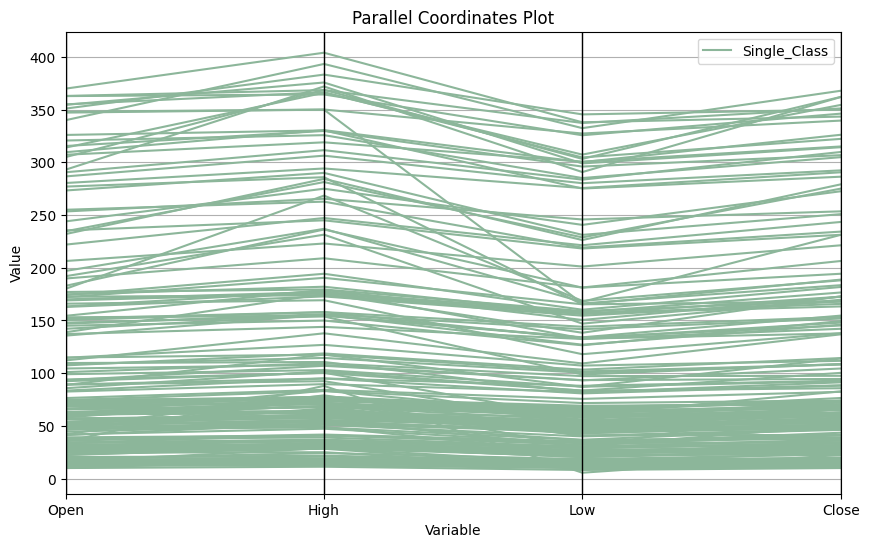

In [20]:
# Candlestick Chart (requires mplfinance)
try:
    from pandas.plotting import parallel_coordinates
    plt.figure(figsize=(10, 6))

    # Create a dummy class column with a constant value
    df['Dummy_Class'] = 'Single_Class'

    parallel_coordinates(df[['Open', 'High', 'Low', 'Close', 'Dummy_Class']].reset_index(drop=True), class_column='Dummy_Class')
    plt.title('Parallel Coordinates Plot')
    plt.xlabel('Variable')
    plt.ylabel('Value')
    plt.xticks(range(4), ['Open', 'High', 'Low', 'Close'])
    plt.show()

except ImportError:
    print("Parallel coordinates plot skipped. Requires pandas.plotting or plotly.")



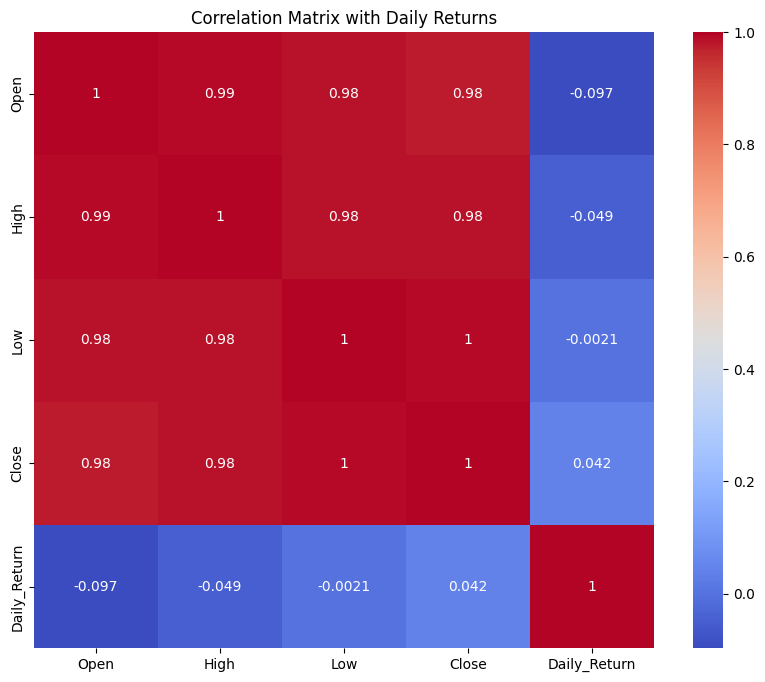

In [21]:
# Correlation Heatmap with Daily Returns
daily_returns = df['Close'].pct_change().dropna()
df_with_returns = df.iloc[1:].copy()  # Align with daily returns
df_with_returns['Daily_Return'] = daily_returns.values
correlation_matrix_with_returns = df_with_returns[['Open', 'High', 'Low', 'Close', 'Daily_Return']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_returns, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Daily Returns')
plt.show()
# Insight: How does daily return correlate with other price metrics? This helps understand the impact of price changes on daily returns.


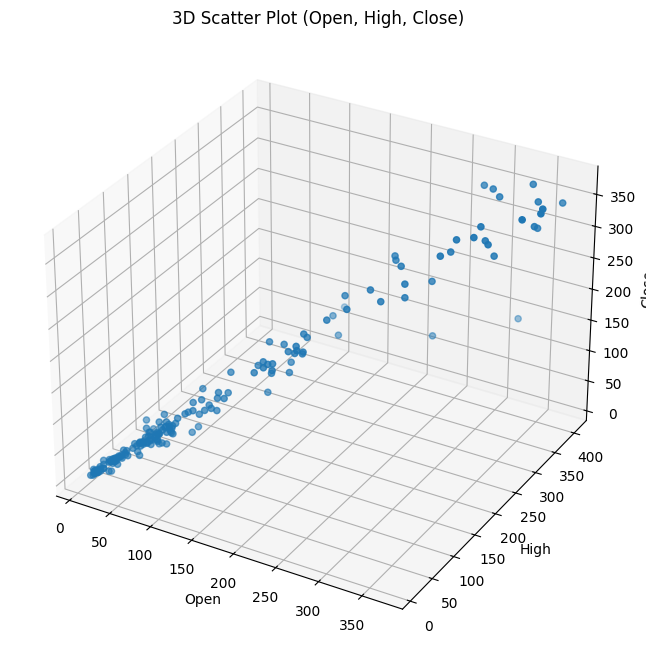

In [22]:
# 3D Scatter Plot (requires matplotlib) - Example with Open, High, Close
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Open'], df['High'], df['Close'])
ax.set_xlabel('Open')
ax.set_ylabel('High')
ax.set_zlabel('Close')
ax.set_title('3D Scatter Plot (Open, High, Close)')
plt.show()
# Insight: Visualizes the relationship between three variables in 3D space. Patterns and clusters can be more apparent.


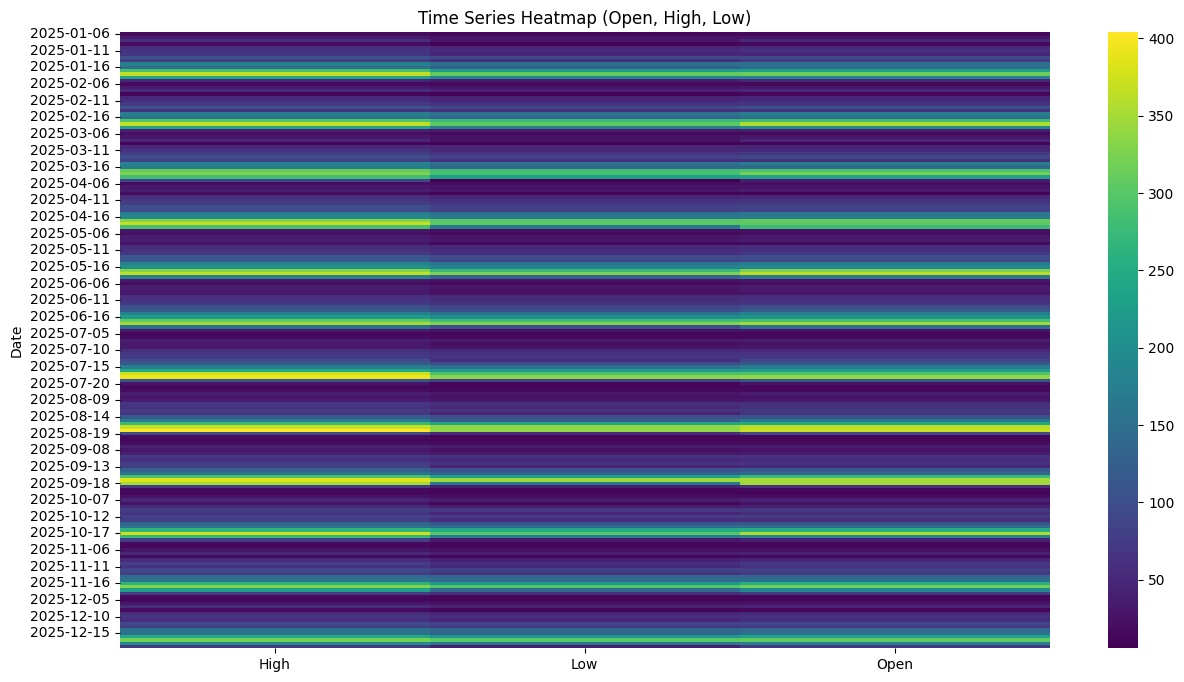

In [23]:
# Time Series Heatmap (requires seaborn) - Example with Open, High, Low
df_heatmap = df.pivot_table(values=['Open', 'High', 'Low'], index=df['Date'].dt.date, aggfunc='mean')
plt.figure(figsize=(15, 8))
sns.heatmap(df_heatmap, cmap='viridis')
plt.title('Time Series Heatmap (Open, High, Low)')
plt.show()
# Insight: Shows how price metrics change over time using color intensity. Can reveal patterns and trends across time.


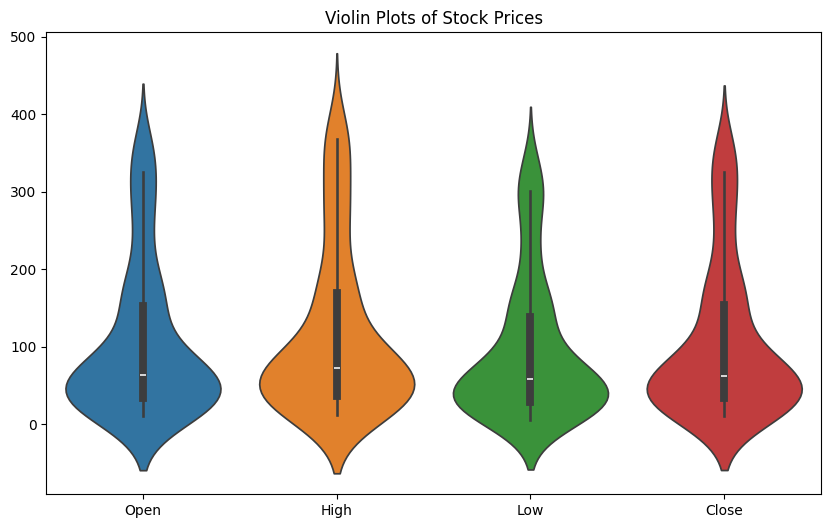

In [24]:
# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title("Violin Plots of Stock Prices")
plt.show()

In [25]:
import plotly.express as px

fig = px.parallel_coordinates(df[['Open', 'High', 'Low', 'Close']],
                               dimensions=['Open', 'High', 'Low', 'Close'],
                               title="Interactive Parallel Coordinates Plot")
fig.show()

In [26]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close Price'))
fig.update_layout(title='Interactive Time Series Plot', xaxis_rangeslider_visible=True)
fig.show()

* Correlation Matrix:

* This will show the relationships between the different price columns.

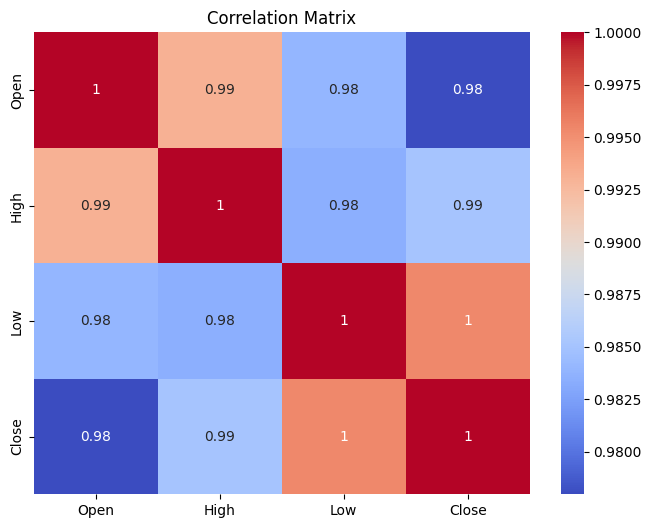

In [27]:
correlation_matrix = df[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 5. Feature Engineering:

* Lagged features are essential for time series forecasting.
* Price range and daily returns can capture volatility.
* Rolling average can help smooth out noise.

In [28]:
# Feature Engineering (Generate Prev_Close)
df['Prev_Close'] = df['Close'].shift(1)
df['Price_Range'] = df['High'] - df['Low']
df['Daily_Return'] = df['Close'].pct_change()
df['Rolling_Mean'] = df['Close'].rolling(window=12).mean()

# Adding Year, Month, Day of Week, and Quarter
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter

# Add Moving Averages
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df.dropna(inplace=True)

## 6. Data Preparation for Modeling

* Split the data into training and testing sets, ensuring shuffle=False for time series.

* Feature and Target Separation: X contains the features, and y contains the target variable ('Close').
* Train-Test Split: The data is split into training and testing sets (80% train, 20% test).
* Data Scaling: StandardScaler standardizes the features, which is essential for many machine learning models.

In [29]:
# Prepare features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Prev_Close', 'Price_Range', 'Daily_Return', 'Rolling_Mean', 'Year', 'Month', 'DayOfWeek', 'Quarter']]
y = df['Close']

In [30]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [31]:
# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Save the scaler
joblib.dump(scaler, r"C:\Users\nag15\OneDrive\Desktop\Labmentix\Yes_Bank_Stock_Price\scaler.pkl")

['C:\\Users\\nag15\\OneDrive\\Desktop\\Labmentix\\Yes_Bank_Stock_Price\\scaler.pkl']

## 7. Model Building (Hyperparameter Tuning and Training)
### Random Forest Regressor
* Hyperparameter Tuning: GridSearchCV is used to find the best hyperparameters * for Random Forest and Ridge Regression using time series cross-validation.
* Model Training: The models are trained on the scaled training data.
*Model Saving: The trained models are saved using joblib.

In [33]:
# Model Building (Hyperparameter Tuning and Training)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=TimeSeriesSplit(n_splits=3), scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_train_scaled, y_train)
model_rf = grid_search_rf.best_estimator_
joblib.dump(model_rf, r'C:\Users\nag15\OneDrive\Desktop\Labmentix\Yes_Bank_Stock_Price\random_forest_model.pkl')


['C:\\Users\\nag15\\OneDrive\\Desktop\\Labmentix\\Yes_Bank_Stock_Price\\random_forest_model.pkl']

### Ridge Regression

In [34]:
# Ridge Regression
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search_ridge = GridSearchCV(Ridge(random_state=42), param_grid_ridge, cv=TimeSeriesSplit(n_splits=3), scoring='neg_mean_absolute_error')
grid_search_ridge.fit(X_train_scaled, y_train)
model_ridge = grid_search_ridge.best_estimator_
joblib.dump(model_ridge, r'C:\Users\nag15\OneDrive\Desktop\Labmentix\Yes_Bank_Stock_Price\ridge_model.pkl')


['C:\\Users\\nag15\\OneDrive\\Desktop\\Labmentix\\Yes_Bank_Stock_Price\\ridge_model.pkl']

### Linear Regression

In [35]:
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
joblib.dump(model_lr, r'C:\Users\nag15\OneDrive\Desktop\Labmentix\Yes_Bank_Stock_Price\linear_regression_model.pkl')


['C:\\Users\\nag15\\OneDrive\\Desktop\\Labmentix\\Yes_Bank_Stock_Price\\linear_regression_model.pkl']

In [36]:
# Gradient Boosting Regressor
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=TimeSeriesSplit(n_splits=3), scoring='neg_mean_absolute_error')
grid_search_gb.fit(X_train_scaled, y_train)
model_gb = grid_search_gb.best_estimator_
joblib.dump(model_gb, r'C:\Users\nag15\OneDrive\Desktop\Labmentix\Yes_Bank_Stock_Price\gradient_boosting_model.pkl')

['C:\\Users\\nag15\\OneDrive\\Desktop\\Labmentix\\Yes_Bank_Stock_Price\\gradient_boosting_model.pkl']

## 8. Model Evaluation
### Predictions
### Calculate MAE
### Determine the best model
### Calculate MSE and RMSE for the best model
* Predictions: The trained models are used to make predictions on the test set.
* MAE Calculation: Mean Absolute Error is calculated to evaluate the models' performance.
* Best Model Selection: The model with the lowest MAE is selected as the best model.
* MSE, RMSE, and R2 Calculation: Mean Squared Error, Root Mean Squared Error, and R-squared are calculated for the best model.

In [37]:
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_ridge = model_ridge.predict(X_test_scaled)
y_pred_lr = model_lr.predict(X_test_scaled)

In [38]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

In [39]:
print(f"Random Forest MAE: {mae_rf}")
print(f"Ridge Regression MAE: {mae_ridge}")
print(f"Linear Regression MAE: {mae_lr}")

Random Forest MAE: 18.237517647058812
Ridge Regression MAE: 10.129003200396616
Linear Regression MAE: 10.268440367680645


In [40]:
models = {'Random Forest': mae_rf, 'Ridge': mae_ridge, 'Linear Regression': mae_lr}
best_model_name = min(models, key=models.get)
best_model = {'Random Forest': model_rf, 'Ridge': model_ridge, 'Linear Regression': model_lr}[best_model_name]

print(f"Best Model: {best_model_name}")


Best Model: Ridge


In [41]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [42]:
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R2: {r2_rf}")

Random Forest MSE: 838.4437259670585
Random Forest RMSE: 28.95589276757079
Random Forest R2: 0.9445670963179258


In [43]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [44]:
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression RMSE: {rmse_ridge}")
print(f"Ridge Regression R2: {r2_ridge}")

Ridge Regression MSE: 246.94569570521514
Ridge Regression RMSE: 15.714505900766182
Ridge Regression R2: 0.9836734219116002


In [45]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [46]:
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression R2: {r2_lr}")

Linear Regression MSE: 251.88748994484473
Linear Regression RMSE: 15.870963737115801
Linear Regression R2: 0.9833466999198697


## 9. Visualizations (Residuals and Predictions)
### Residuals for Random Forest
### Predictions for Random Forest
### Repeat for Ridge and Linear Regression
* Residual Plots: Visualize the residuals (errors) of the models.
* Actual vs. Predicted Plots: Compare the actual and predicted 'Close' prices.

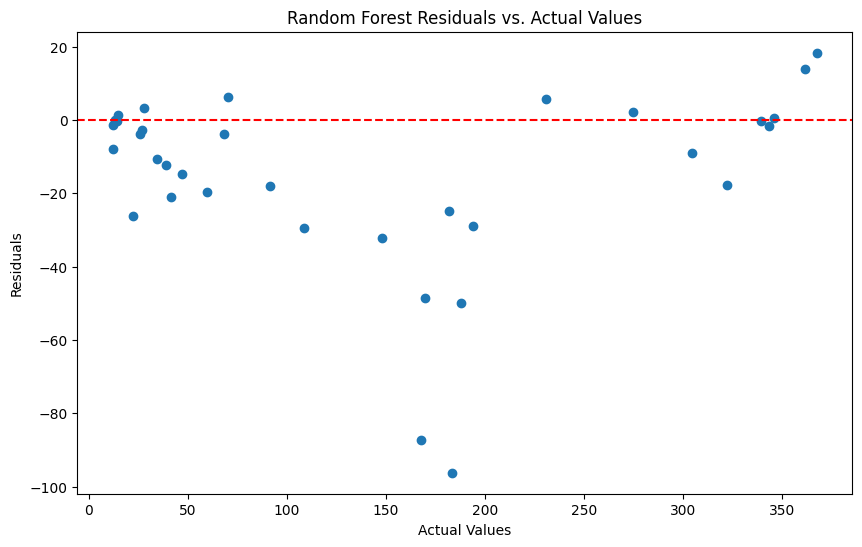

In [47]:
# Random Forest

residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Random Forest Residuals vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

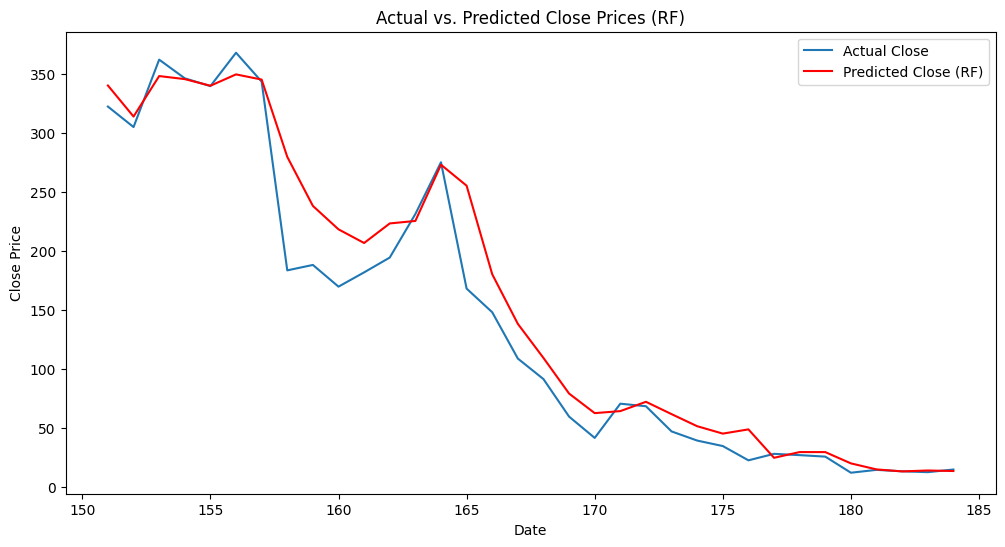

In [48]:
# Random Forest Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close')
plt.plot(y_test.index, y_pred_rf, label='Predicted Close (RF)', color='red')
plt.title('Actual vs. Predicted Close Prices (RF)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

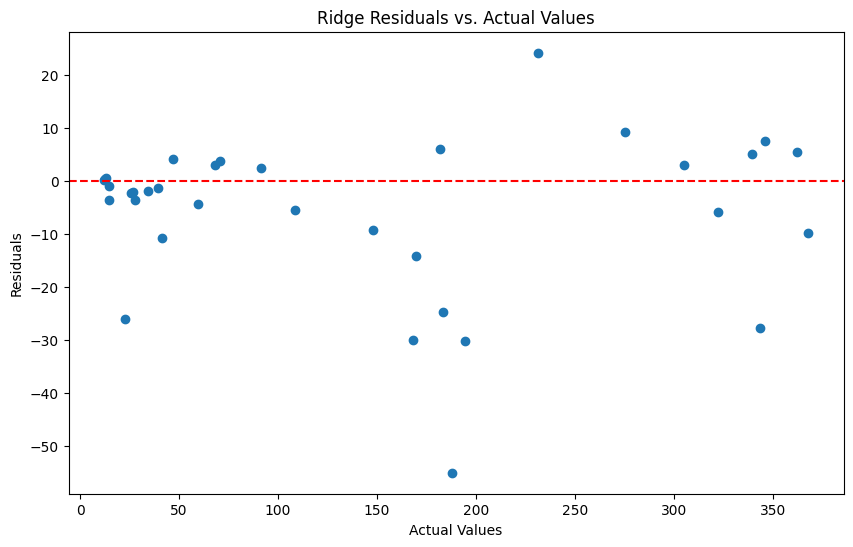

In [49]:
# Ridge Regression Residuals
residuals_ridge = y_test - y_pred_ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_ridge)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Ridge Residuals vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

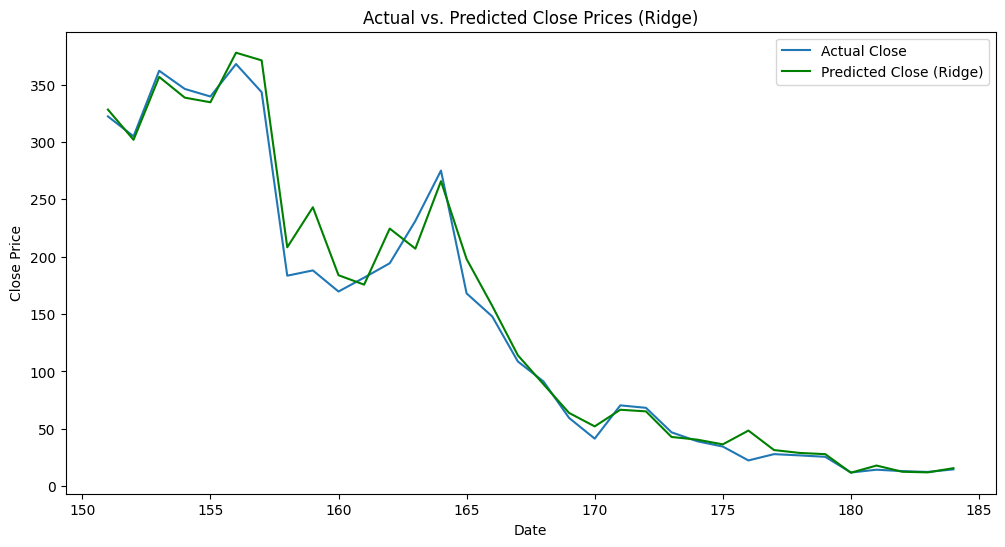

In [50]:
# Ridge Regression Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close')
plt.plot(y_test.index, y_pred_ridge, label='Predicted Close (Ridge)', color='green')
plt.title('Actual vs. Predicted Close Prices (Ridge)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

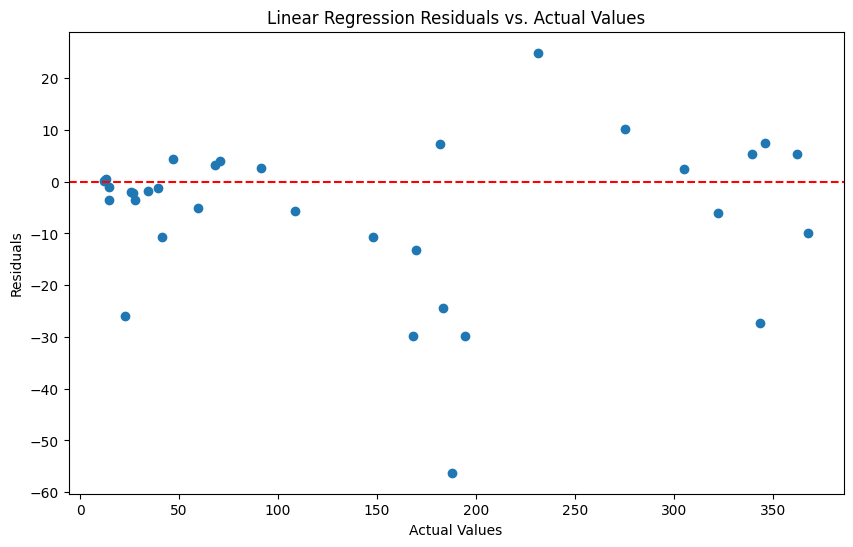

In [51]:
# Linear Regression Residuals
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Linear Regression Residuals vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

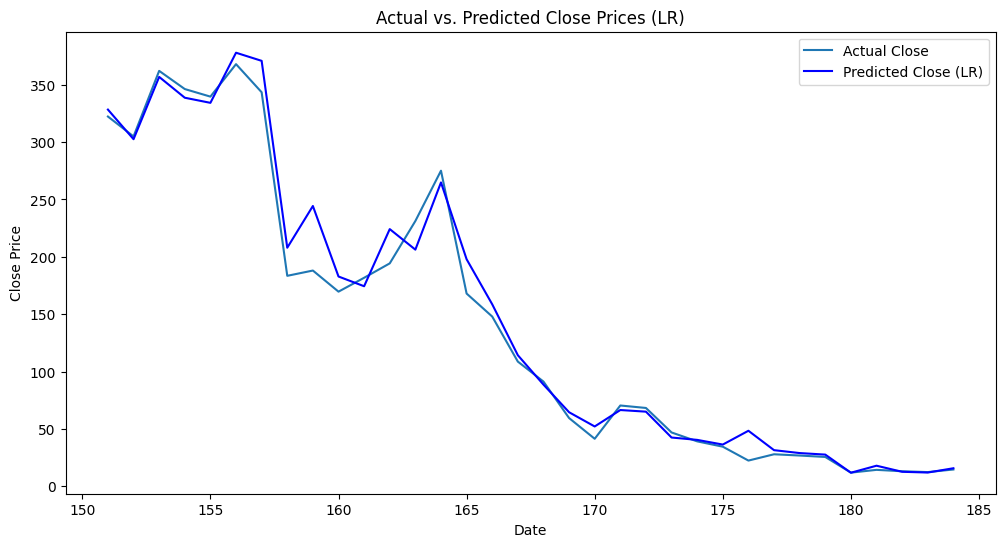

In [52]:
# Linear Regression Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close')
plt.plot(y_test.index, y_pred_lr, label='Predicted Close (LR)', color='blue')
plt.title('Actual vs. Predicted Close Prices (LR)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

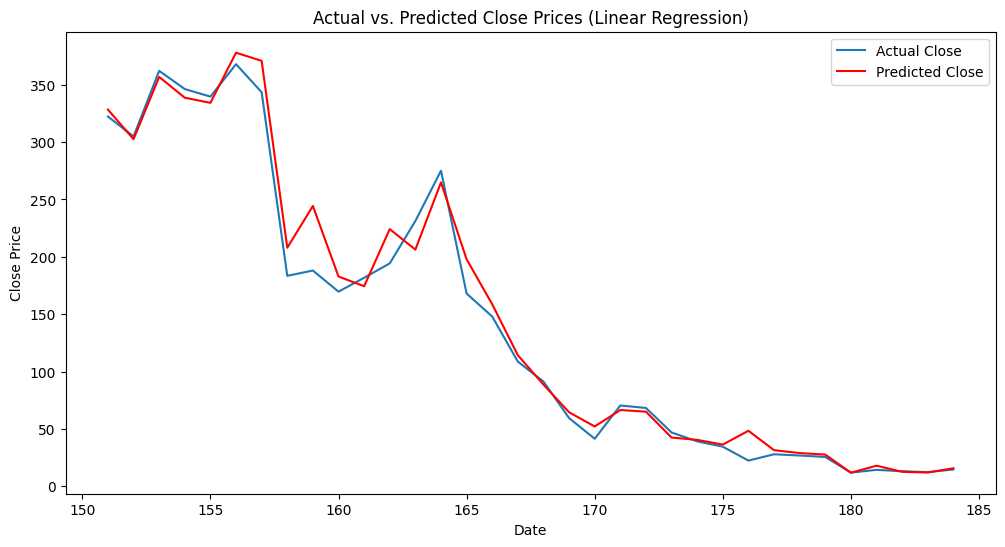

In [53]:
# Time Series Plot of Linear Regression Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close')
plt.plot(y_test.index, y_pred_lr, label='Predicted Close', color='red')
plt.title('Actual vs. Predicted Close Prices (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## 10. Save the Best Model
* The best performing model is saved to a file, so it can be used later without retraining

In [54]:
# 10. Save the Best Model
print("\n--- Saving the Best Model ---")
best_model_path = r'C:\Users\nag15\OneDrive\Desktop\Labmentix\Yes_Bank_Stock_Price\best_model.pkl'
joblib.dump(best_model, best_model_path)
print(f"Best model saved to: {best_model_path}")


--- Saving the Best Model ---
Best model saved to: C:\Users\nag15\OneDrive\Desktop\Labmentix\Yes_Bank_Stock_Price\best_model.pkl
